# A tutorial on spectral clustering
> Paper Author: Ulrike von Luxburg

> Reproduced by: Yang Jiajian

This tutorial is set up as a self-contained introduction to spectral clustering. We derive spectral clustering from
scratch and present different points of view to why spectral clustering works. Apart from basic linear algebra, no particular mathematical background is required by the reader.

## Section 2: Similarity Graph
Given a set of data points $x_1, x_2, \cdots, x_n$, we can define a similarity graph $G$ as follows:

- For each pair of data points $x_i$ and $x_j$, we can define a similarity measure $s_{ij}\geq 0$, which measures the similarity between the two points.
-  Each vertex $v_i$ in this graph represents a data point $x_i$. Two vertices are connected if the similarity $s_{ij}$ between the corresponding data points $x_i$ and $x_j$ is positive or larger than a certain threshold, and the edge is weighted by $s_{ij}$.

The problem of clustering can now be reformulated using the similarity graph:  we want to find a partition of the graph such that the edges between different groups have very low weights and the edges within a group have high weights.

### 2.1 Graph notation
1. Let $G=(V,E)$ be a graph with vertex set $V=\{v_1,v_2,...,v_n\}$. The adjacency matrix of $G$ is denoted by $W=(w_{ij})_{i,j=1,2,...,n}$. If $w_{ij}=0$ this means that the vertices $v_i$ and $v_j$ are not connected by an edge. 

2. The degree of a vertex $v_i\in V$ is defined as: $d_i=\sum_{j=1}^n w_{ij}$. The *degree matrix* $D=\left[\begin{matrix}d_1 & & &\\& d_2 & &\\& & \ddots &\\& & & d_n\end{matrix}\right]$ is defined as the diagonal matrix with the degrees $d_1,d_2,...,d_n$. 

3. Given a subset of vertices $A\subset V$, we define the indicator vector $𝟙_A=(f_1,\cdots,f_n)^\top$ where $f_i=1$ if $v_i\in A$ and $f_i=0$ otherwise. The *binary incidence matrix* $B$ is defined as the matrix with entries $b_{ij}=1$ if the edge $(v_i,v_j)\in E$ belongs to the subset $A$ and $b_{ij}=0$ otherwise. For convenience we introduce the shorthand notation $i\in A$ for the set of indices $\{i|v_i\in A\}$.

4. For two not nessarily disjoint sets $A,B\subset V$, we define: $W(A,B)=\sum_{i\in A,j\in B} w_{ij}$.

5. We consider two different ways of measuring the "size" of a subset $A\subset V$. 
- $|A|:=$ the number of vertices in $A$.
- $\text{vol}(A):=\sum_{i\in A} d_i$.

### 2.2 Different similarity graphs
1. The *ε-neighborhood graph*:
- onnect all points whose pairwise distances are smaller than $ε$.
2. The *k-nearest neighbor graph*:
- connect all points to their k-nearest neighbors.
3. The *fully connected graph*:
- connect all points to all other points.

## Section 3: Graph Laplacian
The main tools for spectral clustering are graph Laplacian matrices. Note that in the literature there is no unique convention which matrix exactly is called “graph Laplacian”. Different authors use different notations and definitions.
> Notice: In the following discussion, we will not necessarily assume that the eigenvectors are normalized. Eigenvalues will always be ordered in increasing order, **considering multiplicities**. By "the first $k$ eigenvectors" we refer to the $k$ eigenvectors corresponding to the $k$ smallest eigenvalues.

### 3.1 The unnormalized graph Laplacian
The unnormalized graph Laplacian matrix $L$ is defined as $L=D-W$. The following proposition summarizes the most important facts needed for spectral clustering.

**Proposition 1 (Properties of L)** 

(1) For every vector $\mathbf{x}\in \R^n$ we have: $\mathbf{x}^\top L \mathbf{x}=\frac{1}{2}\sum_{i,j=1}^n w_{ij}\cdot(x_i-x_j)^2$.

(2) $L$ is symmetric and positive semi-definite.

(3) The smallest eigenvalue of $L$ is 0, the corresponding eigenvector is the constant one vector $𝟙=(1,1,\cdots,1)^\top$.

(4) L has $n$ non-negative, real-valued eigenvalues $0=\lambda_1\leq\lambda_2\leq\cdots\leq\lambda_n$.

Note that the unnormalized graph Laplacian does not depend on the diagonal elements of the adjacency matrix $W$. In particular, self-edges in a graph do not change the corresponding graph Laplacian.

**Proposition 2 (Number of connected components and the spectrum of L)**

Let $G$ be an undirected graph with non-negative weights. Then the **multiplicity** $m$ of the eigenvalue $0$ of $L$ equals the number of connected components $A_1,\cdots, A_k$ in the graph. The eigenspace of eigenvalue $0$ is spanned by the indicator vectors $𝟙_{A_1} ,\cdots, 𝟙_{A_k}$ of those components.

### 3.2 The normalized graph Laplacians
There are two matrices which are called normalized graph Laplacians in the literature. Both matrices are closely related
to each other and are defined as:

$L_{sym}:=D^{-1/2} L D^{-1/2}=I - D^{-1/2} W D^{-1/2}$

$L_{rm}:=D^{-1} L=I - D^{-1} W$

where $D$ is the diagonal matrix of node degrees, $W$ is the weighted adjacency matrix, and $L$ is the unnormalized graph Laplacian.

The main difference between these two matrices is that $L_{sym}$ is symmetric, whereas $L_{rm}$ is not. This means that $L_{sym}$ is a good choice for spectral clustering, as it ensures that the eigenvectors of $L_{sym}$ are orthogonal to each other.

**Proposition 3 (Properties of $L_{sym}$ and $L_{rw}$)**

(1) For every $\mathbf{x}\in \R^n$ we have: $\mathbf{x}^\top L_{sym} \mathbf{x} = \frac{1}{2} \sum_{i,j=1}^n w_{ij}\cdot(\frac{f_i}{\sqrt{d_i}} - \frac{f_j}{\sqrt{d_j}})^2$

(2) $\lambda$ is an eigenvalue of $L_{rw}$ with eigenvector $u$ if and only if $\lambda$ is an eigenvalue of $L_{sym}$ with eigenvector $w = D^{1/2}u$.

(3) $\lambda$ is an eigenvalue of $L_{rw}$ with eigenvector $u$ if and only if $\lambda$ and $u$ solve the generalized eigenproblem $Lu = \lambda Du$.

(4) $0$ is an eigenvalue of $L_{rw}$ with the constant one vector $𝟙$ as eigenvector. $0$ is an eigenvalue of $L_{sym}$ with eigenvector $D^{1/2}𝟙$.

(5) $L_{sym}$ and $L_{rw}$ are positive semi-definite and have $n$ non-negative real-valued eigenvalues $0 = \lambda_1 \leq\cdots\leq \lambda_n$.

**Proposition 4 (Number of connected components and spectra of $L_{sym}$ and $L_{rw}$)**

Let $G$ be an undirected graph with non-negative weights. Then the multiplicity $m$ of the eigenvalue $0$ of both $L_{sym}$ and $L_{rw}$ equals to the number of connected components $A_1,\cdots , A_k$ in the graph. For $L_{rw}$, the
eigenspace of $0$ is spanned by the indicator vectors $𝟙_{A_i}$ of those components. For $L_{sym}$, the eigenspace of $0$ is spanned by the vectors $D^{1/2}𝟙_{A_i}$.

## Section 4: Spectral Clustering Algorithms
Now we would like to state the most common spectral clustering algorithms. We assume that our data consists of $n$ 
"points" $x_1,\cdots , x_n$ which can be arbitrary objects. We measure their pairwise similarities $s_{ij} = s(x_i , x_j )$ by some similarity function which is symmetric and non-negative, and we denote the corresponding similarity matrix by $S = (s_{ij})_{i,j =1,\cdots,n}$.

We construct dataset consists of a random sample of 200 points $x_1,\cdots, x_{200} \in \R$ drawn according to a mixture of four Gaussians.
![](./sample_Data.png)


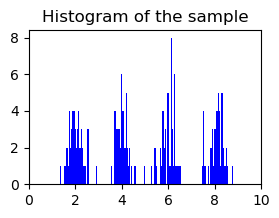

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7404)

means = [2, 4, 6, 8]
std_devs = [0.3, 0.3, 0.3, 0.3]
num_samples = 200

samples = []
for mean, std in zip(means, std_devs):
    samples.append(np.random.normal(mean, std, 50))

data = np.concatenate(samples)
data = sorted(data)

plt.figure(figsize=(3, 2))
plt.hist(data, bins=150, color='blue')
plt.title("Histogram of the sample")
plt.xlim(0,10)
plt.show()

Calculating the **similarity matrix** using the Gaussian similarity function $s(x_i , x_j) = \exp(−|x_i−x_j|^2/(2\sigma^2))$ with $\sigma=1$.

In [46]:
def gaussian_similarity(x, sigma=1.0):
    """Compute the similarity matrix using the Gaussian similarity function."""
    n = len(x)
    S = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            S[i, j] = np.exp(-((x[i] - x[j]) ** 2) / (2 * sigma ** 2))
    return S

def degree_matrix(S):
    """Compute the degree matrix of the similarity matrix."""
    n = len(S)
    D = np.zeros((n, n))
    for i in range(n):
        D[i, i] = np.sum(S[i])
    return D

S = gaussian_similarity(data, sigma=1.0)

Construct a similarity graph by one of the ways described in Section 2.

In [47]:
def fully_connected_graph(similarity_matrix):
    return similarity_matrix

def k_nearest_neighbors_graph(similarity_matrix, k):
    n = similarity_matrix.shape[0]
    graph = np.zeros((n, n))
    for i in range(n):
        indices = np.argsort(similarity_matrix[i])[::-1][:k]
        for j in indices:
            graph[i][j] = similarity_matrix[i][j]
            graph[j][i] = similarity_matrix[i][j]
    return graph

In [48]:
# Unnormalized spectral clustering
from scipy.sparse.linalg import eigsh
def unnormalized_spectral_clustering(similarity_matrix, n_clusters, similarity_graphs = 'fully_connected_graph'):
    W = []
    if similarity_graphs == 'fully_connected_graph':
        W = fully_connected_graph(similarity_matrix)
    elif similarity_graphs == 'knn_graph':
        W = k_nearest_neighbors_graph(similarity_matrix, k=10)
    D = degree_matrix(W)
    L = D - W
    # compute the first n_clusters eigenvalues and eigenvectors of L
    smallest_k_eigvals, smallest_k_eigvecs = eigsh(L, k=n_clusters, which='SM')
    return smallest_k_eigvals, smallest_k_eigvecs

def normalized_spectral_clustering(similarity_matrix, n_clusters, similarity_graphs = 'fully_connected_graph'):
    W = []
    if similarity_graphs == 'fully_connected_graph':
        W = fully_connected_graph(similarity_matrix)
    elif similarity_graphs == 'knn_graph':
        W = k_nearest_neighbors_graph(similarity_matrix, k=10)
    D = degree_matrix(W)
    D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D)))
    L_sym = np.eye(W.shape[0]) - D_inv_sqrt @ W @ D_inv_sqrt
    smallest_k_eigvals, smallest_k_eigvecs = eigsh(L_sym, k=n_clusters, which='SM')
    return smallest_k_eigvals, smallest_k_eigvecs



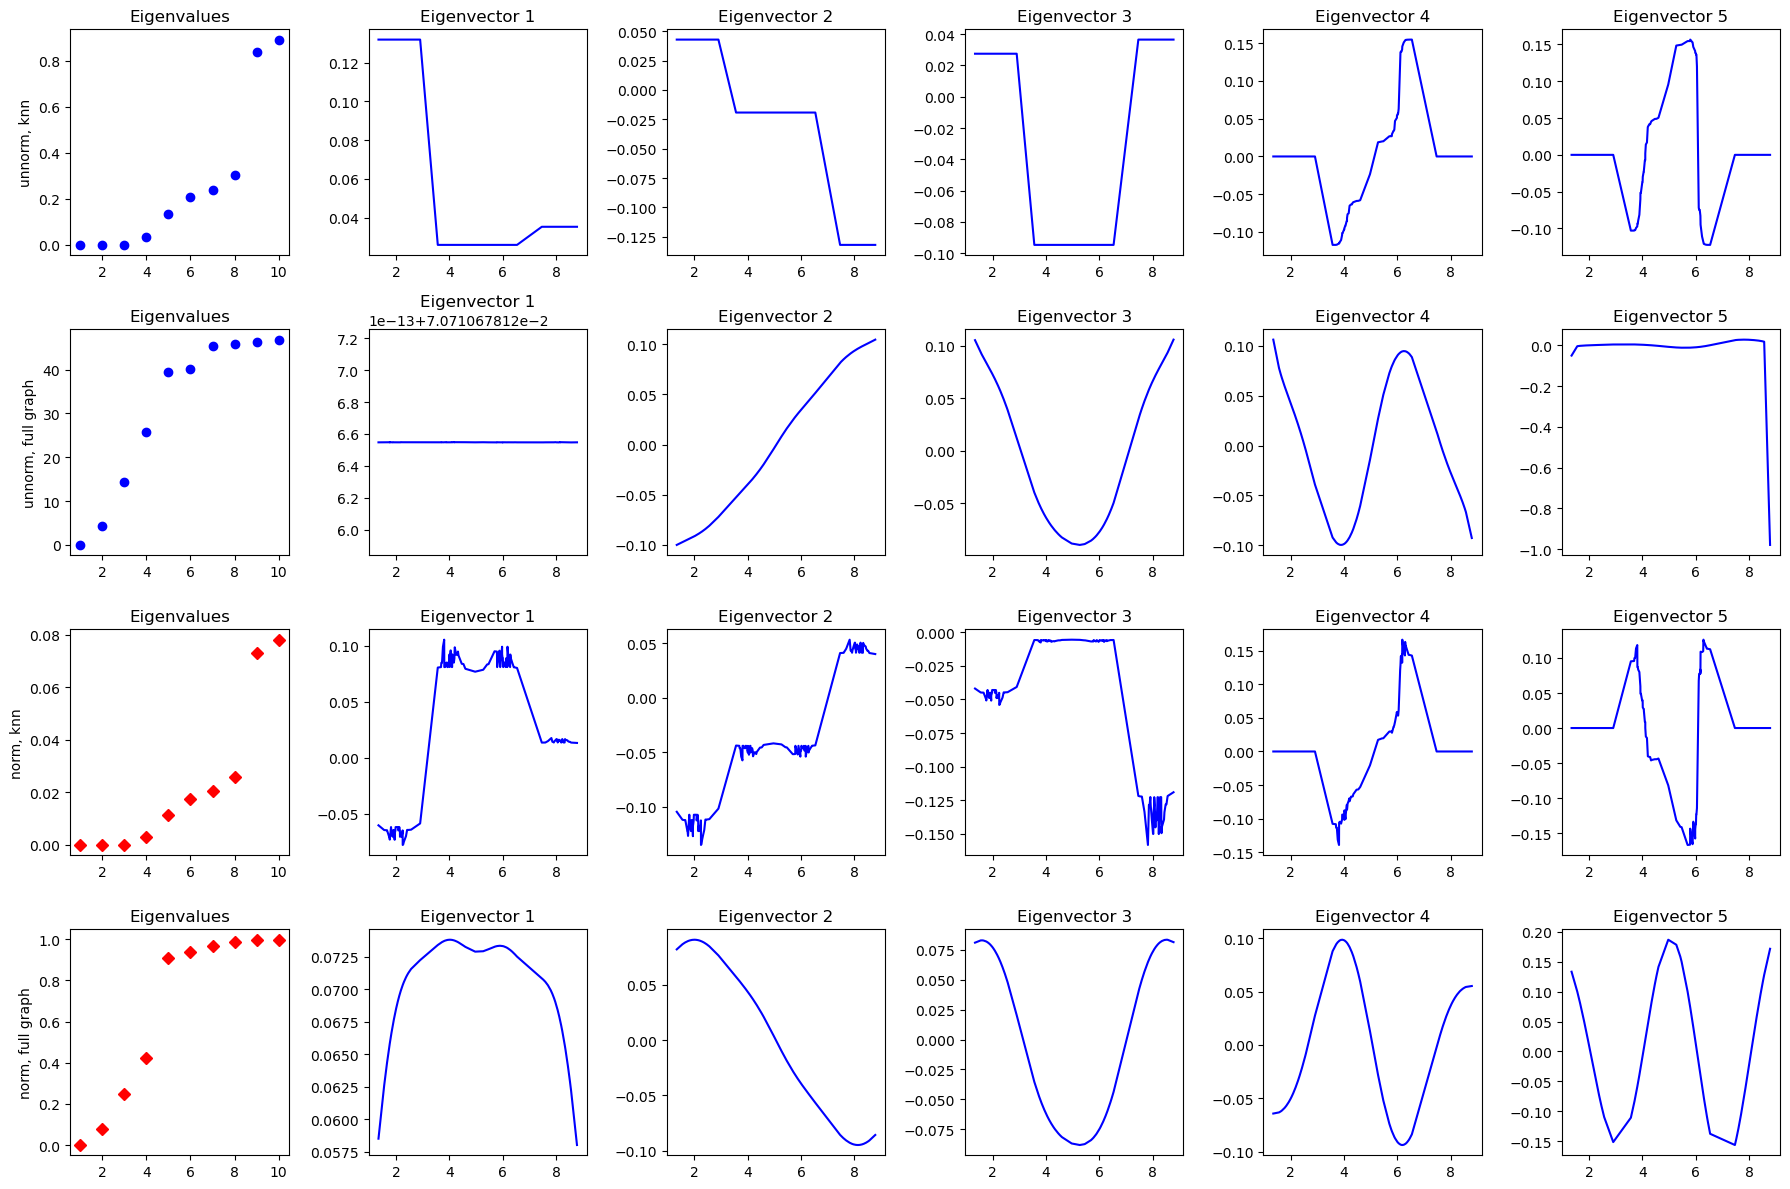

In [ ]:
eigvals1, eigvecs1 = unnormalized_spectral_clustering(similarity_matrix=S,n_clusters=10,similarity_graphs='knn_graph')
eigvals2, eigvecs2 = unnormalized_spectral_clustering(similarity_matrix=S,n_clusters=10,similarity_graphs='fully_connected_graph')
eigvals3, eigvecs3 = normalized_spectral_clustering(similarity_matrix=S,n_clusters=10,similarity_graphs='knn_graph')
eigvals4, eigvecs4 = normalized_spectral_clustering(similarity_matrix=S,n_clusters=10,similarity_graphs='fully_connected_graph')
# Plot the eigenvalues
fig, axes = plt.subplots(4, 6, figsize=(18, 12))


for i, (eigvals, title) in enumerate(zip(
    [eigvals1, eigvals2,eigvals3,eigvals4], 
    ["unnorm, knn",  "unnorm, full graph", "norm, knn","norm, full graph"]
)):
    axes[i, 0].plot(range(1, len(eigvals) + 1), eigvals, 'bo' if (i == 0 or i==1) else 'rD')
    axes[i, 0].set_title("Eigenvalues")
    axes[i, 0].set_ylabel(title)

for i, (eigvecs, title) in enumerate(zip(
    [eigvecs1, eigvecs2, eigvecs3, eigvecs4], 
    ["unnorm, knn",  "unnorm, full graph","norm, knn","norm, full graph"]
)):
    for j in range(5):  # 取前 5 个特征向量
        axes[i, j + 1].plot(data, eigvecs[:, j], 'b-')
        axes[i, j + 1].set_title(f"Eigenvector {j+1}")

plt.tight_layout()
plt.show()